# Heart Disease Prediction

![heart_image](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/rich_media_quiz/topic/rmq_heart_anatomy/405x225_getty_rf_illustration_of_heart.jpg?resize=692px:*)

### Importing libraries to import and manipulate dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_df = pd.read_csv("./heart.csv")
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
heart_df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

## Creating models for the dataset
Since the problem is classifying the disease into target from 1 to 4 Hence using classification models

In [5]:
array = heart_df.values
X = array[:,0:12]
Y = array[:,13]

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 30)

In [7]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [8]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=150)

Confusion Matrix

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

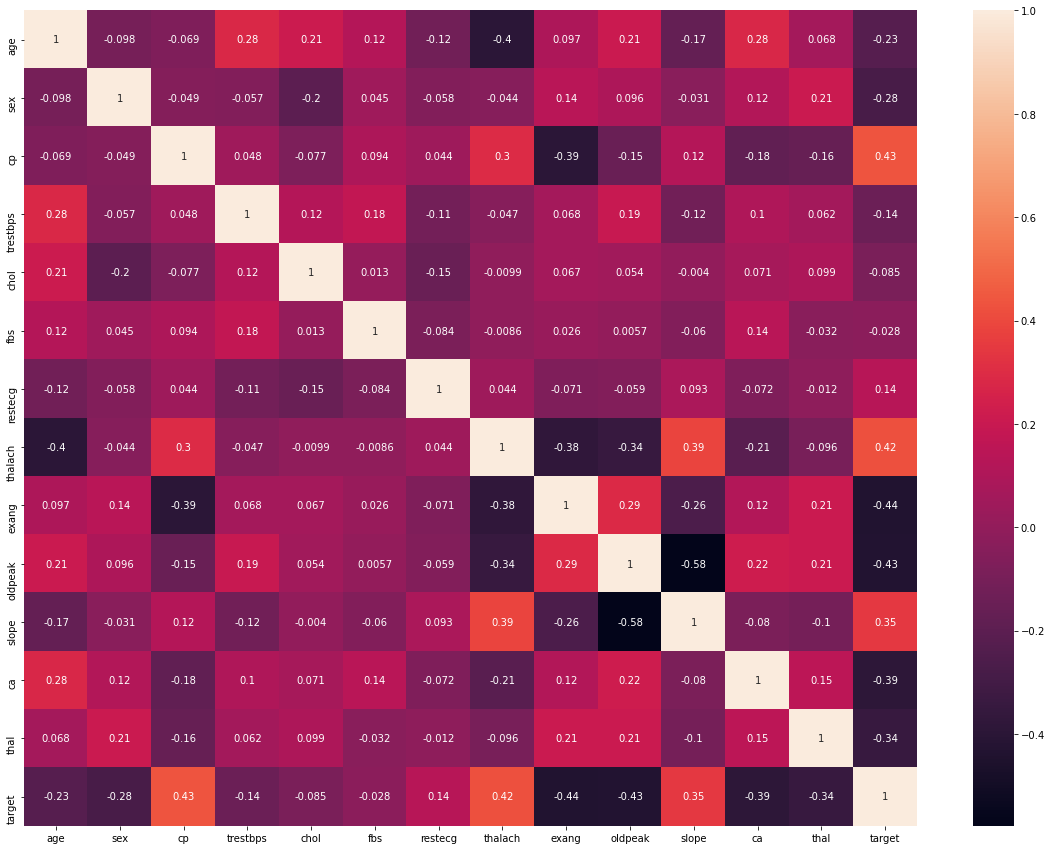

In [15]:
plt.figure(figsize = (20,15))

sns.heatmap(heart_df.corr(), annot =True)

### Building Classifier Models

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [10]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, Y_train)
# evaluate the model
test_score = knn_model.score(X_test, Y_test)
print("Testing Accuracy of KNN:", test_score)

Testing Accuracy of KNN: 0.6065573770491803


In [18]:
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print("Average Accuracy of KNN:", results.mean())

Average Accuracy of KNN: 0.6538709677419355
